# Esma 3016, lab5
## Edgar Acuna
### Enero 2019

Organizacion y presentacion de datos cualitativos.
Usaremos el modulo numpy, el modulo pandas, que se usa para hacer analisis estadistico basico y el modulo matplotlib que se usa para hacer la tabla de frecuencias y las graficas.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from plotnine import * 
import seaborn as sns
%matplotlib inline

In [3]:
#Leyendo datos de la internet, las columnas tienen nombres
#leyendo tambien los valores faltantes (missing values)
datos=pd.read_csv("http://academic.uprm.edu/eacuna/clase97.txt",na_values="*",sep=" ")
#Viendo las seis primera fila de la tabla de datos
datos.head()

,edad,sexo,escuela,programa,creditos,gpa,familia,hestud,htv
0,21,f,publ,biol,119.0,3.60,3,35,10
1,18,f,priv,mbio,15.0,3.60,3,30,10
2,19,f,priv,biot,73.0,3.61,5,5,7
3,20,f,priv,mbio,NaN,2.38,3,14,3
4,21,m,publ,pmed,114.0,3.15,2,25,25


In [4]:
tabla=pd.crosstab(index=datos['programa'],columns='counts')
tabla['frec.relativa.porc']=tabla*100/tabla.sum()
tabla

col_0,counts,frec.relativa.porc
programa,,
biol,3,10.714286
biot,1,3.571429
eagr,2,7.142857
mbio,13,46.428571
pmed,9,32.142857


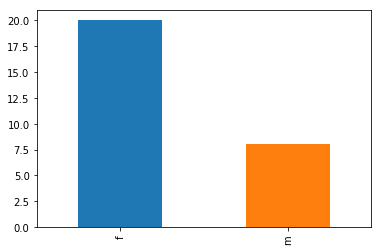

In [5]:
datos['sexo'].value_counts().plot(kind='bar')

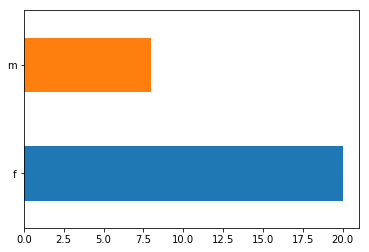

In [6]:
datos['sexo'].value_counts().plot(kind='barh')

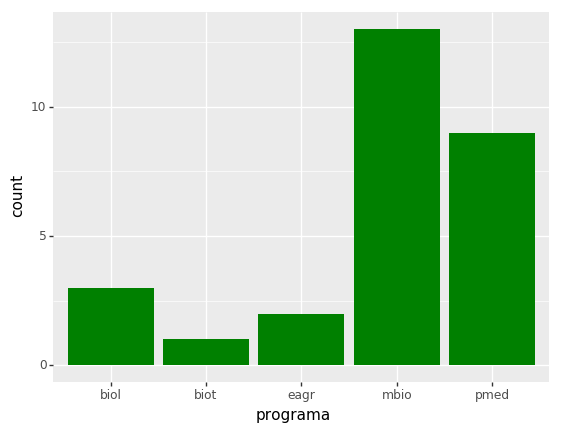

<ggplot: (-9223371885491803276)>

In [7]:
#Grafica de barras en ggplot
ggplot(aes(x="programa"), data=datos) + geom_bar(fill="green")

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

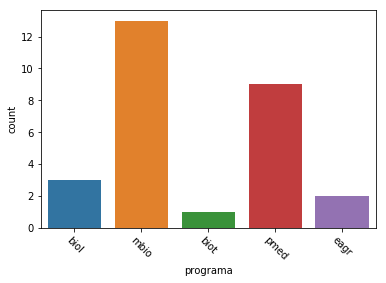

In [8]:
#Grafica de barras en seaborn
sns.countplot(x="programa",data=datos)
plt.xticks(rotation=-45)

In [9]:
# Graficas de barras en plotly
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

data=[go.Bar(x=['biol','mbio','biot','pmed','eagr'],y=[3,13,1,9,2])]

plotly.offline.iplot(data, filename='barras verticales')

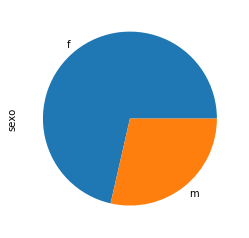

In [10]:
datos['sexo'].value_counts().plot.pie()

In [11]:
# Grafica Pie-chart en plotly
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

x=['biol','mbio','biot','pmed','eagr']

y=[3,13,1,9,2]
data=go.Pie(labels=x, values=y)

plotly.offline.iplot([data], filename='Pie Chart')

In [12]:
datos1=pd.read_csv("http://academic.uprm.edu/eacuna/fastfoods.TXT",sep="\t")
datos1

,Nombre,Cantidad
0,BurgerKing,113
1,McDonald,97
2,TacoMaker,63
3,KentuckyFriedChicken,58
4,PizzaHut,51
5,Churchs,46
6,Dominos,30
7,Wendys,24
8,TacoBell,22
9,Ponderosa,21


In [13]:
#Haciendo que la columna nombre sea los indices
datos2=datos1.set_index('Nombre')
datos2

,Cantidad
Nombre,
BurgerKing,113
McDonald,97
TacoMaker,63
KentuckyFriedChicken,58
PizzaHut,51
Churchs,46
Dominos,30
Wendys,24
TacoBell,22


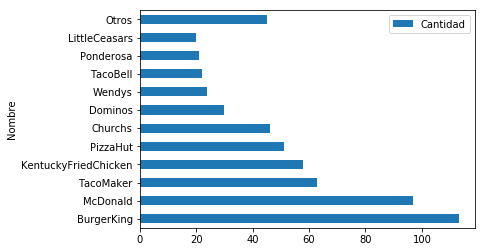

In [14]:
datos2.plot(kind='barh')

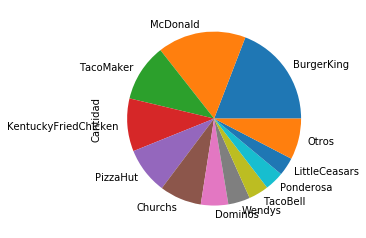

In [15]:
datos1.plot(kind='pie',y='Cantidad',labels=datos1['Nombre'],legend=False)

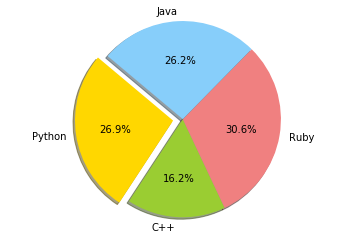

In [16]:
# Otro ejemplo resaltando un slice
labels = 'Python', 'C++', 'Ruby', 'Java'
sizes = [215, 130, 245, 210]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # Resaltando el primer slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()